<a href="https://colab.research.google.com/github/OsbornOuO/ml_virtual_currency/blob/main/05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finlab_crypto > log.txt

import finlab_crypto
finlab_crypto.setup()

ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT','1d')

|------------------------------
| Google Drive not connected!  
|------------------------------
|
| Please connect google drive:
Mounted at /content/drive
All caught up..!


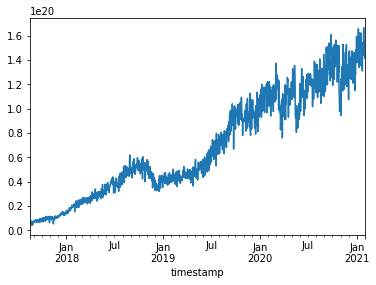

In [17]:
from finlab_crypto.crawler import GlassnodeClient

from datetime import timezone
import datetime

def get_glassnode(url,api_key,index):
  gn = GlassnodeClient()
  gn.api_key = api_key
  ret = gn.get(url)
  ret.index = ret.index + datetime.timedelta(days=1)
  ret.index = ret.index.tz_localize(timezone.utc)
  ret = ret.reindex(index,method='ffill').ffill()
  return ret.astype(float)

hash_rate = get_glassnode('https://api.glassnode.com/v1/metrics/mining/hash_rate_mean','8707e0ef-be8e-4586-8aee-2cb07293f2e8',ohlcv.index)

hash_rate.plot()

# Miner capitulation

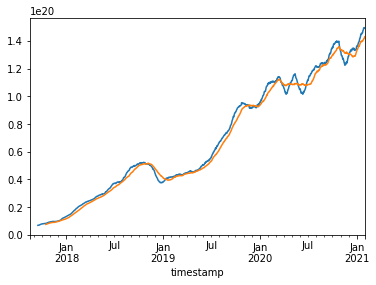

In [18]:
hash_rate_ma30 = hash_rate.rolling(30).mean()
hash_rate_ma60 = hash_rate.rolling(60).mean()

hash_rate_ma30.plot()
hash_rate_ma60.plot()

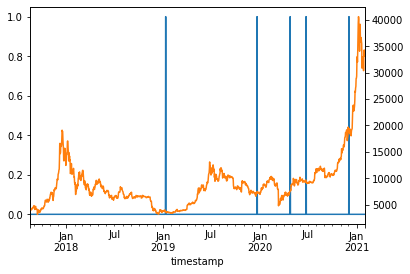

In [21]:
cross = (hash_rate_ma30 > hash_rate_ma60) & (hash_rate_ma30.shift()< hash_rate_ma60.shift())
cross.astype(int).plot()
ohlcv.close.plot(secondary_y = True)

In [39]:
import pandas as pd

results = {}

for d in range(1,181):
  dprice = ohlcv.close[cross.shift(d).fillna(False)].values
  results[d] = pd.Series(dprice)

results = pd.DataFrame(results)
results = results.transpose()
results = results.div(results.iloc[0])

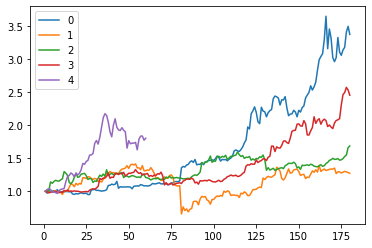

In [40]:
results.plot()

In [43]:
results.loc[[1,30,60,90,180]]

,0,1,2,3,4
1,1.000000,1.000000,1.000000,1.000000,1.000000
30,1.027052,1.193921,1.156926,1.031170,1.725332
60,1.083614,1.311508,1.208419,1.259327,1.804053
90,1.400276,0.845552,1.239786,1.138399,NaN
180,3.379272,1.272395,1.685734,2.456320,NaN
